<a href="https://colab.research.google.com/github/shamim237/Vegetable-Leaf-Classification/blob/main/LEAF_VGG16(img_pro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import os
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing import image
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [ ]:
size = 128
num_classes= 4

In [ ]:
# Leave it as comment, you don't have to run this

# train_images = []
# train_labels = [] 

# for directory_path in glob.glob("/content/drive/MyDrive/LEAF_DATASET(EQUAL)/LEAF_DATASET(EQUAL)/train/*"):
#     label = directory_path.split("/")[-1]
#     print(label)
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         print(img_path)
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
#         img = cv2.resize(img, (size, size ))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         img = cv2.Canny(img, 10, 200)
#         train_images.append(img)
#         train_labels.append(label)

# #Convert lists to arrays        
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

In [ ]:
# Leave it as comment, you don't have to run this

# test_images = []
# test_labels = [] 

# for directory_path in glob.glob("/content/drive/MyDrive/LEAF_DATASET(EQUAL)/LEAF_DATASET(EQUAL)/validation/*"):
#     im_label = directory_path.split("/")[-1]
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (size, size))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         img = cv2.Canny(img, 10, 200)
#         #train_images.append(img)
#         test_images.append(img)
#         test_labels.append(im_label)
#         print(img_path)

# #Convert lists to arrays                
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

In [ ]:
# import pickle

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_train(canny).pickle', 'wb')
# pickle.dump(train_images, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_train_labels(canny).pickle', 'wb')
# pickle.dump(train_labels, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_test(canny).pickle', 'wb')
# pickle.dump(test_images, pick_in)
# pick_in.close()

# pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_test_labels(canny).pickle', 'wb')
# pickle.dump(test_labels, pick_in)
# pick_in.close()


In [ ]:
import pickle

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_train(canny).pickle', 'rb')
train_images = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_train_labels(canny).pickle', 'rb')
train_labels = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_data_test(canny).pickle', 'rb')
test_images = pickle.load(pick_in)
pick_in.close()

pick_in = open('/content/drive/MyDrive/LEAF_DATASET(EQUAL)/leaf_test_labels(canny).pickle', 'rb')
test_labels = pickle.load(pick_in)
pick_in.close()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4120, 128, 128), (920, 128, 128), (4120, 4), (920, 4))

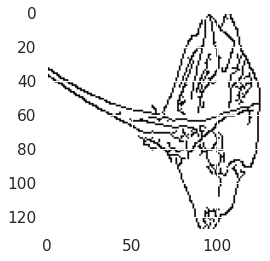

In [ ]:
plt.imshow(x_train[2300], cmap= 'binary')

In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1) # reshape the image shape to rgb channels
print(x_train.shape)

(4120, 128, 128, 3)


In [ ]:
x_test = np.repeat(x_test[..., np.newaxis], 3 , -1) # reshape the image shape to rgb channels
print(x_test.shape) 

(920, 128, 128, 3)


In [ ]:
x_train.shape

(4120, 128, 128, 3)

In [ ]:
# load the weights of pre-trained VGG-16 model

model_d= tf.keras.applications.VGG16(weights="imagenet",
                                     include_top=False,
                                     input_tensor=Input
                                     (shape=(size, size, 3)))

In [ ]:
x= model_d.layers[-3].output
x= GlobalAveragePooling2D()(x)
x= Dropout(0.3)(x)
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dense(64,activation='relu')(x)

predictions= Dense(4, activation = 'softmax')(x)
model= Model(inputs= model_d.input, outputs= predictions)

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
pip install tensorflow-addons # uncomment and run this, if you got an error in the next cell

In [ ]:
import tensorflow_addons as tfa
model.compile(optimizer= Adam(lr= 0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy',
              tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
              tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
              tfa.metrics.F1Score(num_classes=4),
              tfa.metrics.CohenKappa(num_classes=4)])


In [ ]:
history= model.fit(x_train, y_train, batch_size = 64, 
                   validation_data= (x_test, y_test), 
                   epochs = 20)

Epoch 1/20
65/65 [==============================] - 16s 213ms/step - loss: 0.8511 - accuracy: 0.6643 - precision_1: 0.7147 - recall_1: 0.5942 - f1_score: 0.6496 - cohen_kappa: 0.5514 - val_loss: 0.4328 - val_accuracy: 0.9272 - val_precision_1: 0.9862 - val_recall_1: 0.7793 - val_f1_score: 0.9267 - val_cohen_kappa: 0.9029
Epoch 2/20
65/65 [==============================] - 13s 200ms/step - loss: 0.1431 - accuracy: 0.9498 - precision_1: 0.9559 - recall_1: 0.9417 - f1_score: 0.9496 - cohen_kappa: 0.9330 - val_loss: 0.1910 - val_accuracy: 0.9674 - val_precision_1: 0.9765 - val_recall_1: 0.9489 - val_f1_score: 0.9675 - val_cohen_kappa: 0.9565
Epoch 3/20
65/65 [==============================] - 13s 200ms/step - loss: 0.0829 - accuracy: 0.9748 - precision_1: 0.9776 - recall_1: 0.9716 - f1_score: 0.9750 - cohen_kappa: 0.9663 - val_loss: 0.1889 - val_accuracy: 0.9587 - val_precision_1: 0.9686 - val_recall_1: 0.9380 - val_f1_score: 0.9578 - val_cohen_kappa: 0.9449
Epoch 4/20
65/65 [=============

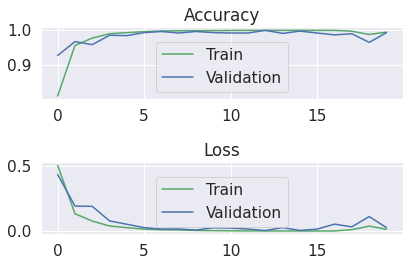


train_accuracy :  [0.8097087144851685, 0.9563106894493103, 0.977669894695282, 0.9902912378311157, 0.9934465885162354, 0.9963592290878296, 0.9983009696006775, 0.9987863898277283, 0.9990290999412537, 0.9992718696594238, 0.9997572898864746, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9975728392601013, 0.9881067872047424, 0.9949029088020325]
valid_accuracy :  [0.927173912525177, 0.967391312122345, 0.958695650100708, 0.9858695864677429, 0.9847826361656189, 0.9934782385826111, 0.9967391490936279, 0.9923912882804871, 0.9967391490936279, 0.9934782385826111, 0.9923912882804871, 0.9923912882804871, 1.0, 0.991304337978363, 0.997826099395752, 0.9923912882804871, 0.9869565367698669, 0.990217387676239, 0.9652174115180969, 0.9934782385826111]
train_err :  [0.5021146535873413, 0.13274067640304565, 0.07680974155664444, 0.03870353475213051, 0.026385597884655, 0.014635627157986164, 0.010013033635914326, 0.008170070126652718, 0.004879064857959747, 0.0036425914149731398, 0.002335007069632411, 0.0013473345898091793, 0

In [ ]:
#matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

In [ ]:
(loss, 
accuracy, 
f1_score, precision, recall,cohen_kappa) = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy = ', (accuracy * 100.0))

29/29 [==============================] - 2s 84ms/step - loss: 0.0267 - accuracy: 0.9935 - precision_1: 0.9946 - recall_1: 0.9935 - f1_score: 0.9935 - cohen_kappa: 0.9913
Accuracy =  99.34782385826111


In [ ]:
y_true = np.argmax(y_test, axis=-1)

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

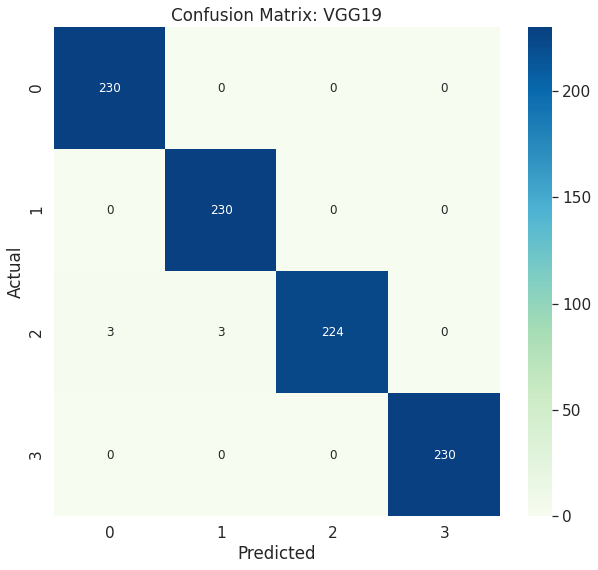

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix: VGG19')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="GnBu", annot=True, fmt= 'g', annot_kws={"size": 12})# font size

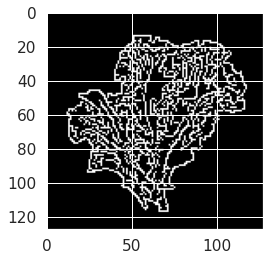

In [ ]:
img = cv2.imread('/content/kale8.jpg')

img = cv2.resize(img, (size, size ))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.Canny(img, 10, 200)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

In [ ]:
img= img.reshape(1, 128,128,3)
pred = model.predict(img)
output = np.argmax(pred, axis=1)
output  # array[0] = kale, array[1] = lettuce, array[2] = spinach and array[3] = water_spinach

array([0])

In [ ]:
test_labels

array(['kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
       'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale', 'kale',
      